<a href="https://colab.research.google.com/github/AnselLian/Capstone_project/blob/main/cancer_prediction_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Package Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Import

In [ ]:
#data = pd.read_csv('/content/gdrive/MyDrive/cancer_data_final_version.csv')
data = pd.read_csv('/content/gdrive/MyDrive/Ansel_ICF_Capstone/cancer_prediction.csv')

In [ ]:
data.head()

,county,FIPS,lat,lng,gender_ratio,african_american,white,age_17,age_65,life_expectancy,...,Adjusted_Death_Rate,Incidence_Count,Death_Count,Trend_Incidence,Trend_Death,Crude_Death,CrudeRate_White,CrudeRate_nonwhite,CrudeRate_F,CrudeRate_M
0,Autauga,1001,32.535142,-86.642900,1.06,19.3,74.5,24.2,14.6,76.3,...,149.4,1728431.0,599666.0,-0.9,-2.0,1076.7,1162.4,805.7,976.3,1183.1
1,Baldwin,1003,30.727825,-87.722745,1.06,9.0,83.0,21.9,19.5,78.6,...,151.6,331.0,102.0,0.5,-1.8,1146.2,1202.6,755.6,1014.1,1286.6
2,Barbour,1005,31.870090,-85.391068,0.90,47.9,46.0,21.1,18.0,75.8,...,155.2,1369.0,497.0,0.1,-1.2,1409.4,1635.2,1191.5,1396.1,1421.3
3,Bibb,1007,32.998376,-87.126814,0.87,21.5,74.3,20.7,16.3,73.9,...,190.4,156.0,67.0,-0.1,-1.1,1315.3,1429.7,941.1,1366.1,1271.0
4,Blount,1009,33.980871,-86.567006,1.03,1.5,86.9,23.4,17.8,74.6,...,186.1,130.0,52.0,0.3,-0.9,1331.6,1361.8,654.0,1253.5,1411.4


In [ ]:
print(data.columns)


Index(['county', 'FIPS', 'lat', 'lng', 'gender_ratio', 'african_american',
       'white', 'age_17', 'age_65', 'life_expectancy', 'adult_smoking',
       'excessive_drinking', 'frequent_physical_distress',
       'frequent_mental_distress', 'physically_inactive', 'diabetic',
       'disable', 'PCI', 'income_inequality', 'unemployed', 'poverty', 'debt',
       'food_environment_index', 'food_insecure', 'built_domain_environment',
       'residential_segregation', 'crowd', 'severe_housing_problem',
       'social_association', 'edu_highschool', 'edu_secondary', 'uninsured',
       'medicare_pricing', 'PCP', 'preventable_hosp_stays', 'MUA_status',
       'IMU_score', 'HPSA_score', 'Adjusted_Incidence_Rate',
       'Adjusted_Death_Rate', 'Incidence_Count', 'Death_Count',
       'Trend_Incidence', 'Trend_Death', 'Crude_Death', 'CrudeRate_White',
       'CrudeRate_nonwhite', 'CrudeRate_F', 'CrudeRate_M'],
      dtype='object')


In [ ]:
data.shape, data.dtypes

((3142, 49),
 county                         object
 FIPS                            int64
 lat                           float64
 lng                           float64
 gender_ratio                  float64
 african_american              float64
 white                         float64
 age_17                        float64
 age_65                        float64
 life_expectancy               float64
 adult_smoking                   int64
 excessive_drinking              int64
 frequent_physical_distress      int64
 frequent_mental_distress        int64
 physically_inactive             int64
 diabetic                        int64
 disable                         int64
 PCI                             int64
 income_inequality             float64
 unemployed                    float64
 poverty                       float64
 debt                          float64
 food_environment_index        float64
 food_insecure                   int64
 built_domain_environment      float64
 residential

## Exploratory Data Analysis

### Overview

Checking missing value

In [ ]:
data.isnull().sum()

county                           0
FIPS                             0
lat                              2
lng                              2
gender_ratio                     0
african_american                 0
white                            0
age_17                           0
age_65                           0
life_expectancy                 69
adult_smoking                    0
excessive_drinking               0
frequent_physical_distress       0
frequent_mental_distress         0
physically_inactive              0
diabetic                         0
disable                          0
PCI                              0
income_inequality                0
unemployed                       1
poverty                          0
debt                             4
food_environment_index          19
food_insecure                    0
built_domain_environment         0
residential_segregation       1083
crowd                            0
severe_housing_problem           0
social_association  

In [ ]:
columns_to_drop=['FIPS','lat','lng']
cancer_data=data.drop(columns_to_drop,axis=1)

In [ ]:
cols_to_process = cancer_data.columns[cancer_data.columns.get_loc("gender_ratio"):cancer_data.columns.get_loc("HPSA_score")+1].tolist()
cols_to_process.remove('MUA_status')
for col in cols_to_process:
    cancer_data[col].fillna(cancer_data[col].median(), inplace=True)
cancer_data.isna().sum()

county                           0
gender_ratio                     0
african_american                 0
white                            0
age_17                           0
age_65                           0
life_expectancy                  0
adult_smoking                    0
excessive_drinking               0
frequent_physical_distress       0
frequent_mental_distress         0
physically_inactive              0
diabetic                         0
disable                          0
PCI                              0
income_inequality                0
unemployed                       0
poverty                          0
debt                             0
food_environment_index           0
food_insecure                    0
built_domain_environment         0
residential_segregation          0
crowd                            0
severe_housing_problem           0
social_association               0
edu_highschool                   0
edu_secondary                    0
uninsured           

Descriptive Statistics

In [ ]:
cancer_data.describe()

,gender_ratio,african_american,white,age_17,age_65,life_expectancy,adult_smoking,excessive_drinking,frequent_physical_distress,frequent_mental_distress,...,HPSA_score,Adjusted_Incidence_Rate,Adjusted_Death_Rate,Incidence_Count,Death_Count,Trend_Incidence,Trend_Death,Crude_Death,CrudeRate_nonwhite,CrudeRate_M
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3142.000000,2779.000000,3080.000000,2.880000e+03,3132.000000,2674.000000,3049.000000,3130.000000,2040.000000,3114.000000
mean,0.999262,8.967409,76.285933,22.363240,18.365181,77.446404,17.867919,17.408975,11.986951,12.209102,...,10.485360,453.811983,164.016916,1.169586e+03,382.895275,-0.450000,-1.098524,1228.703706,768.499657,1301.512845
std,0.080175,14.309395,20.150028,3.493236,4.586146,2.968764,3.667239,3.263913,2.346359,1.914407,...,6.937315,60.439650,27.746109,3.223574e+04,10724.202876,1.927697,1.397122,303.705826,441.899442,336.243604
min,0.360000,0.000000,2.800000,5.300000,3.800000,62.400000,7.000000,9.000000,7.000000,8.000000,...,0.000000,0.000000,57.100000,3.000000e+00,3.000000,-27.100000,-17.800000,241.700000,98.500000,259.500000
25%,0.980000,0.700000,64.525000,20.300000,15.425000,75.600000,15.000000,15.000000,10.000000,11.000000,...,3.000000,420.950000,146.700000,6.400000e+01,27.000000,-0.900000,-1.400000,1023.525000,460.550000,1068.725000
50%,1.010000,2.200000,83.700000,22.300000,18.000000,77.500000,17.000000,17.000000,12.000000,12.000000,...,12.000000,460.300000,162.900000,1.575000e+02,62.000000,-0.300000,-1.000000,1243.650000,718.700000,1303.400000
75%,1.040000,10.200000,92.500000,24.100000,20.800000,79.200000,20.000000,20.000000,14.000000,13.000000,...,16.000000,491.750000,179.600000,4.272500e+02,152.000000,0.200000,-0.700000,1438.625000,1033.250000,1525.125000
max,1.330000,85.300000,97.900000,40.500000,55.600000,98.000000,43.000000,29.000000,25.000000,22.000000,...,24.000000,1204.000000,414.500000,1.728431e+06,599666.000000,21.600000,24.000000,2941.600000,11879.400000,3087.600000


### Preprocessing

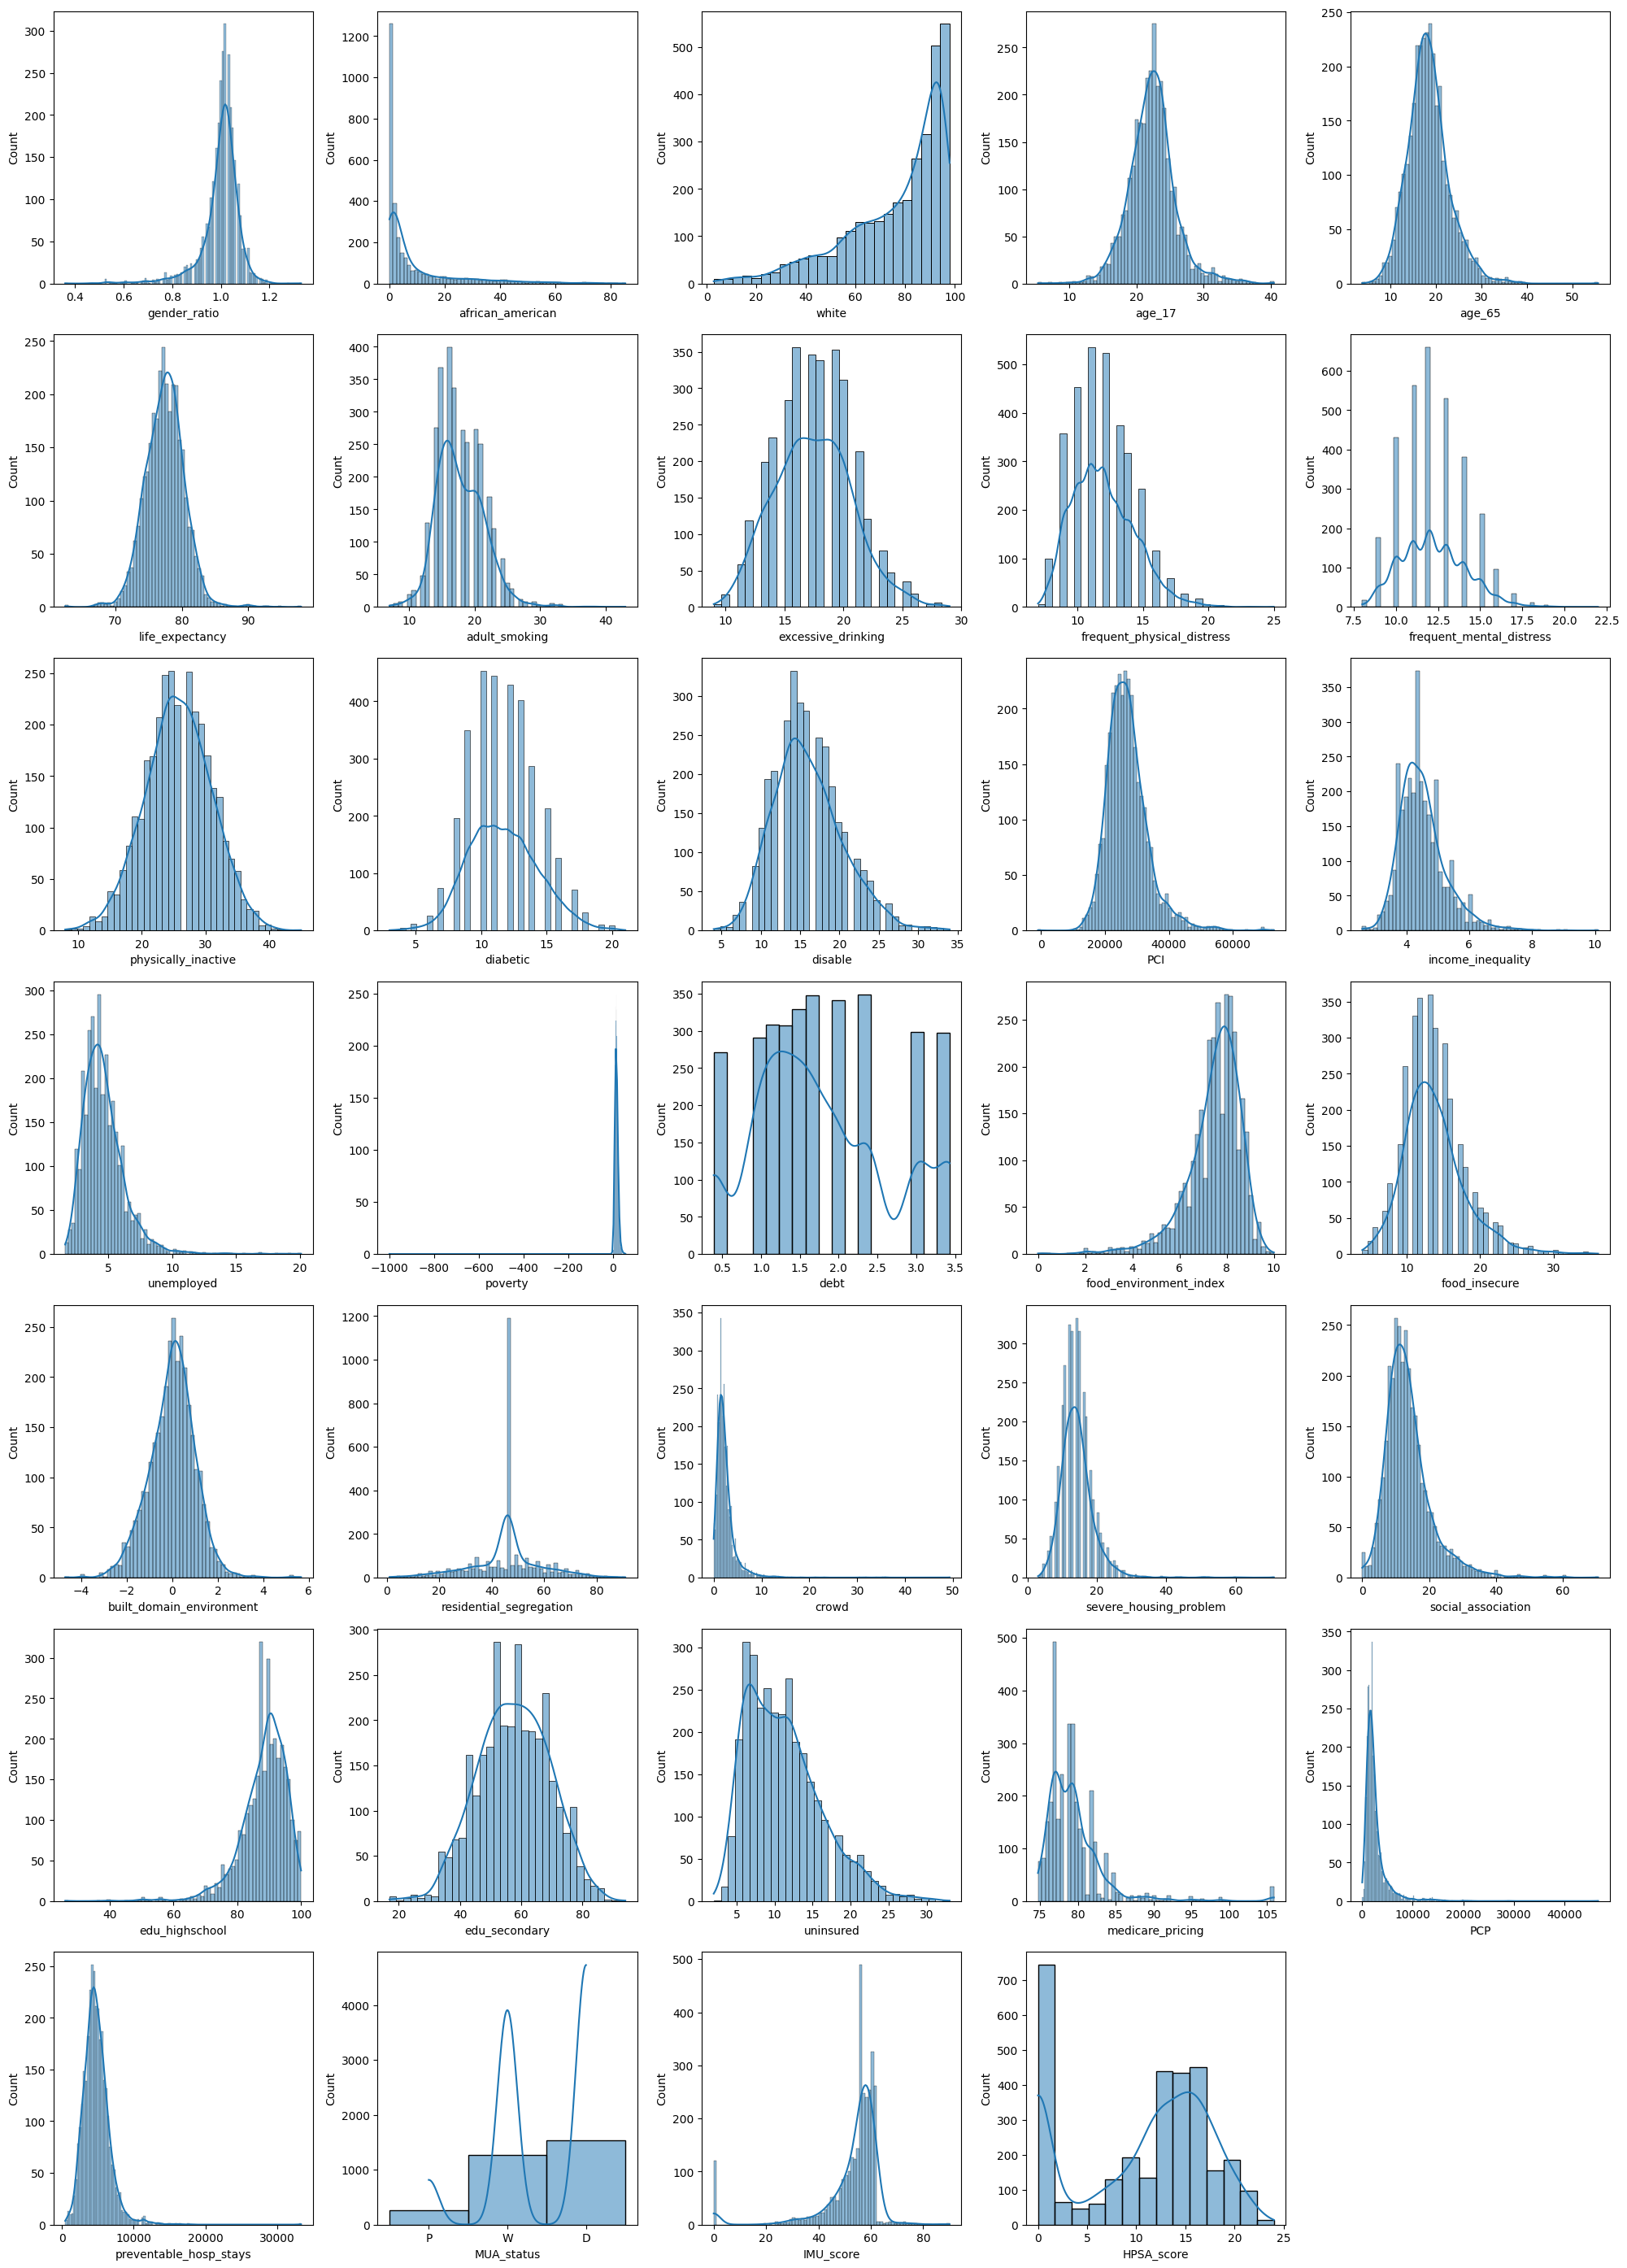

In [ ]:
subset = cancer_data.loc[:, 'gender_ratio':'HPSA_score']

n_features = len(subset.columns)
n_cols = 5
n_rows = 7

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

# Remove empty graph
for i in range(n_features, n_rows*n_cols):
    fig.delaxes(axs.flatten()[i])

# Histograms
for i, column in enumerate(subset.columns):
    r = i // n_cols
    c = i % n_cols
    ax = axs[r][c]
    sns.histplot(subset[column], ax=ax, kde=True)


plt.tight_layout()
plt.show()


Remove Outliers (poverty, crowd, PCP, preventable_hosp_stays)

In [ ]:
def remove_outliers_zscore(dataframe, column_name, threshold):
    z_scores = np.abs((dataframe[column_name] - dataframe[column_name].mean()) / dataframe[column_name].std())
    filtered_data = dataframe[z_scores < threshold]
    return filtered_data


cancer_data = remove_outliers_zscore(cancer_data, 'poverty', threshold=4)
cancer_data = remove_outliers_zscore(cancer_data, 'crowd', threshold=4)
cancer_data = remove_outliers_zscore(cancer_data, 'PCP', threshold=3)
cancer_data = remove_outliers_zscore(cancer_data, 'preventable_hosp_stays', threshold=3)


Outcome Data Cleaning

In [ ]:
Adjusted_Incidence_Rate_summary = cancer_data['Adjusted_Incidence_Rate'].describe()
Adjusted_Death_Rate_summary = cancer_data['Adjusted_Death_Rate'].describe()
Crude_Death_summary = cancer_data['Crude_Death'].describe()
CrudeRate_White_summary = cancer_data['CrudeRate_White'].describe()
CrudeRate_nonwhite_summary = cancer_data['CrudeRate_nonwhite'].describe()
CrudeRate_F_summary = cancer_data['CrudeRate_F'].describe()
CrudeRate_M_summary = cancer_data['CrudeRate_M'].describe()

In [ ]:
Adjusted_Incidence_Rate_summary, Adjusted_Death_Rate_summary,Crude_Death_summary,CrudeRate_White_summary,CrudeRate_nonwhite_summary,CrudeRate_F_summary,CrudeRate_M_summary

(count    2664.000000
 mean      453.499700
 std        60.126297
 min         0.000000
 25%       420.750000
 50%       460.000000
 75%       491.525000
 max      1204.000000
 Name: Adjusted_Incidence_Rate, dtype: float64,
 count    2960.000000
 mean      163.804696
 std        27.411791
 min        63.600000
 25%       146.700000
 50%       162.800000
 75%       179.300000
 max       414.500000
 Name: Adjusted_Death_Rate, dtype: float64,
 count    3006.000000
 mean     1225.552628
 std       302.123381
 min       241.700000
 25%      1020.100000
 50%      1239.700000
 75%      1433.750000
 max      2941.600000
 Name: Crude_Death, dtype: float64,
 count      3014
 unique     2643
 top       #N/A 
 freq         15
 Name: CrudeRate_White, dtype: object,
 count     1962.000000
 mean       759.359378
 std        443.547367
 min         98.500000
 25%        454.425000
 50%        706.000000
 75%       1020.325000
 max      11879.400000
 Name: CrudeRate_nonwhite, dtype: float64,
 count    

In [ ]:
# Replace "Unreliable" with "NA" in object column
cancer_data["Adjusted_Incidence_Rate "] = cancer_data["Adjusted_Incidence_Rate"].replace("data not available ", " ")
cancer_data["Adjusted_Incidence_Rate"] = pd.to_numeric(cancer_data["Adjusted_Incidence_Rate"], errors='coerce')

cancer_data["Crude_Death"] = cancer_data["Crude_Death"].replace("Unreliable", " ")
cancer_data["Crude_Death"] = pd.to_numeric(cancer_data["Crude_Death"], errors='coerce')


### Data Visualization

Feature Distribution

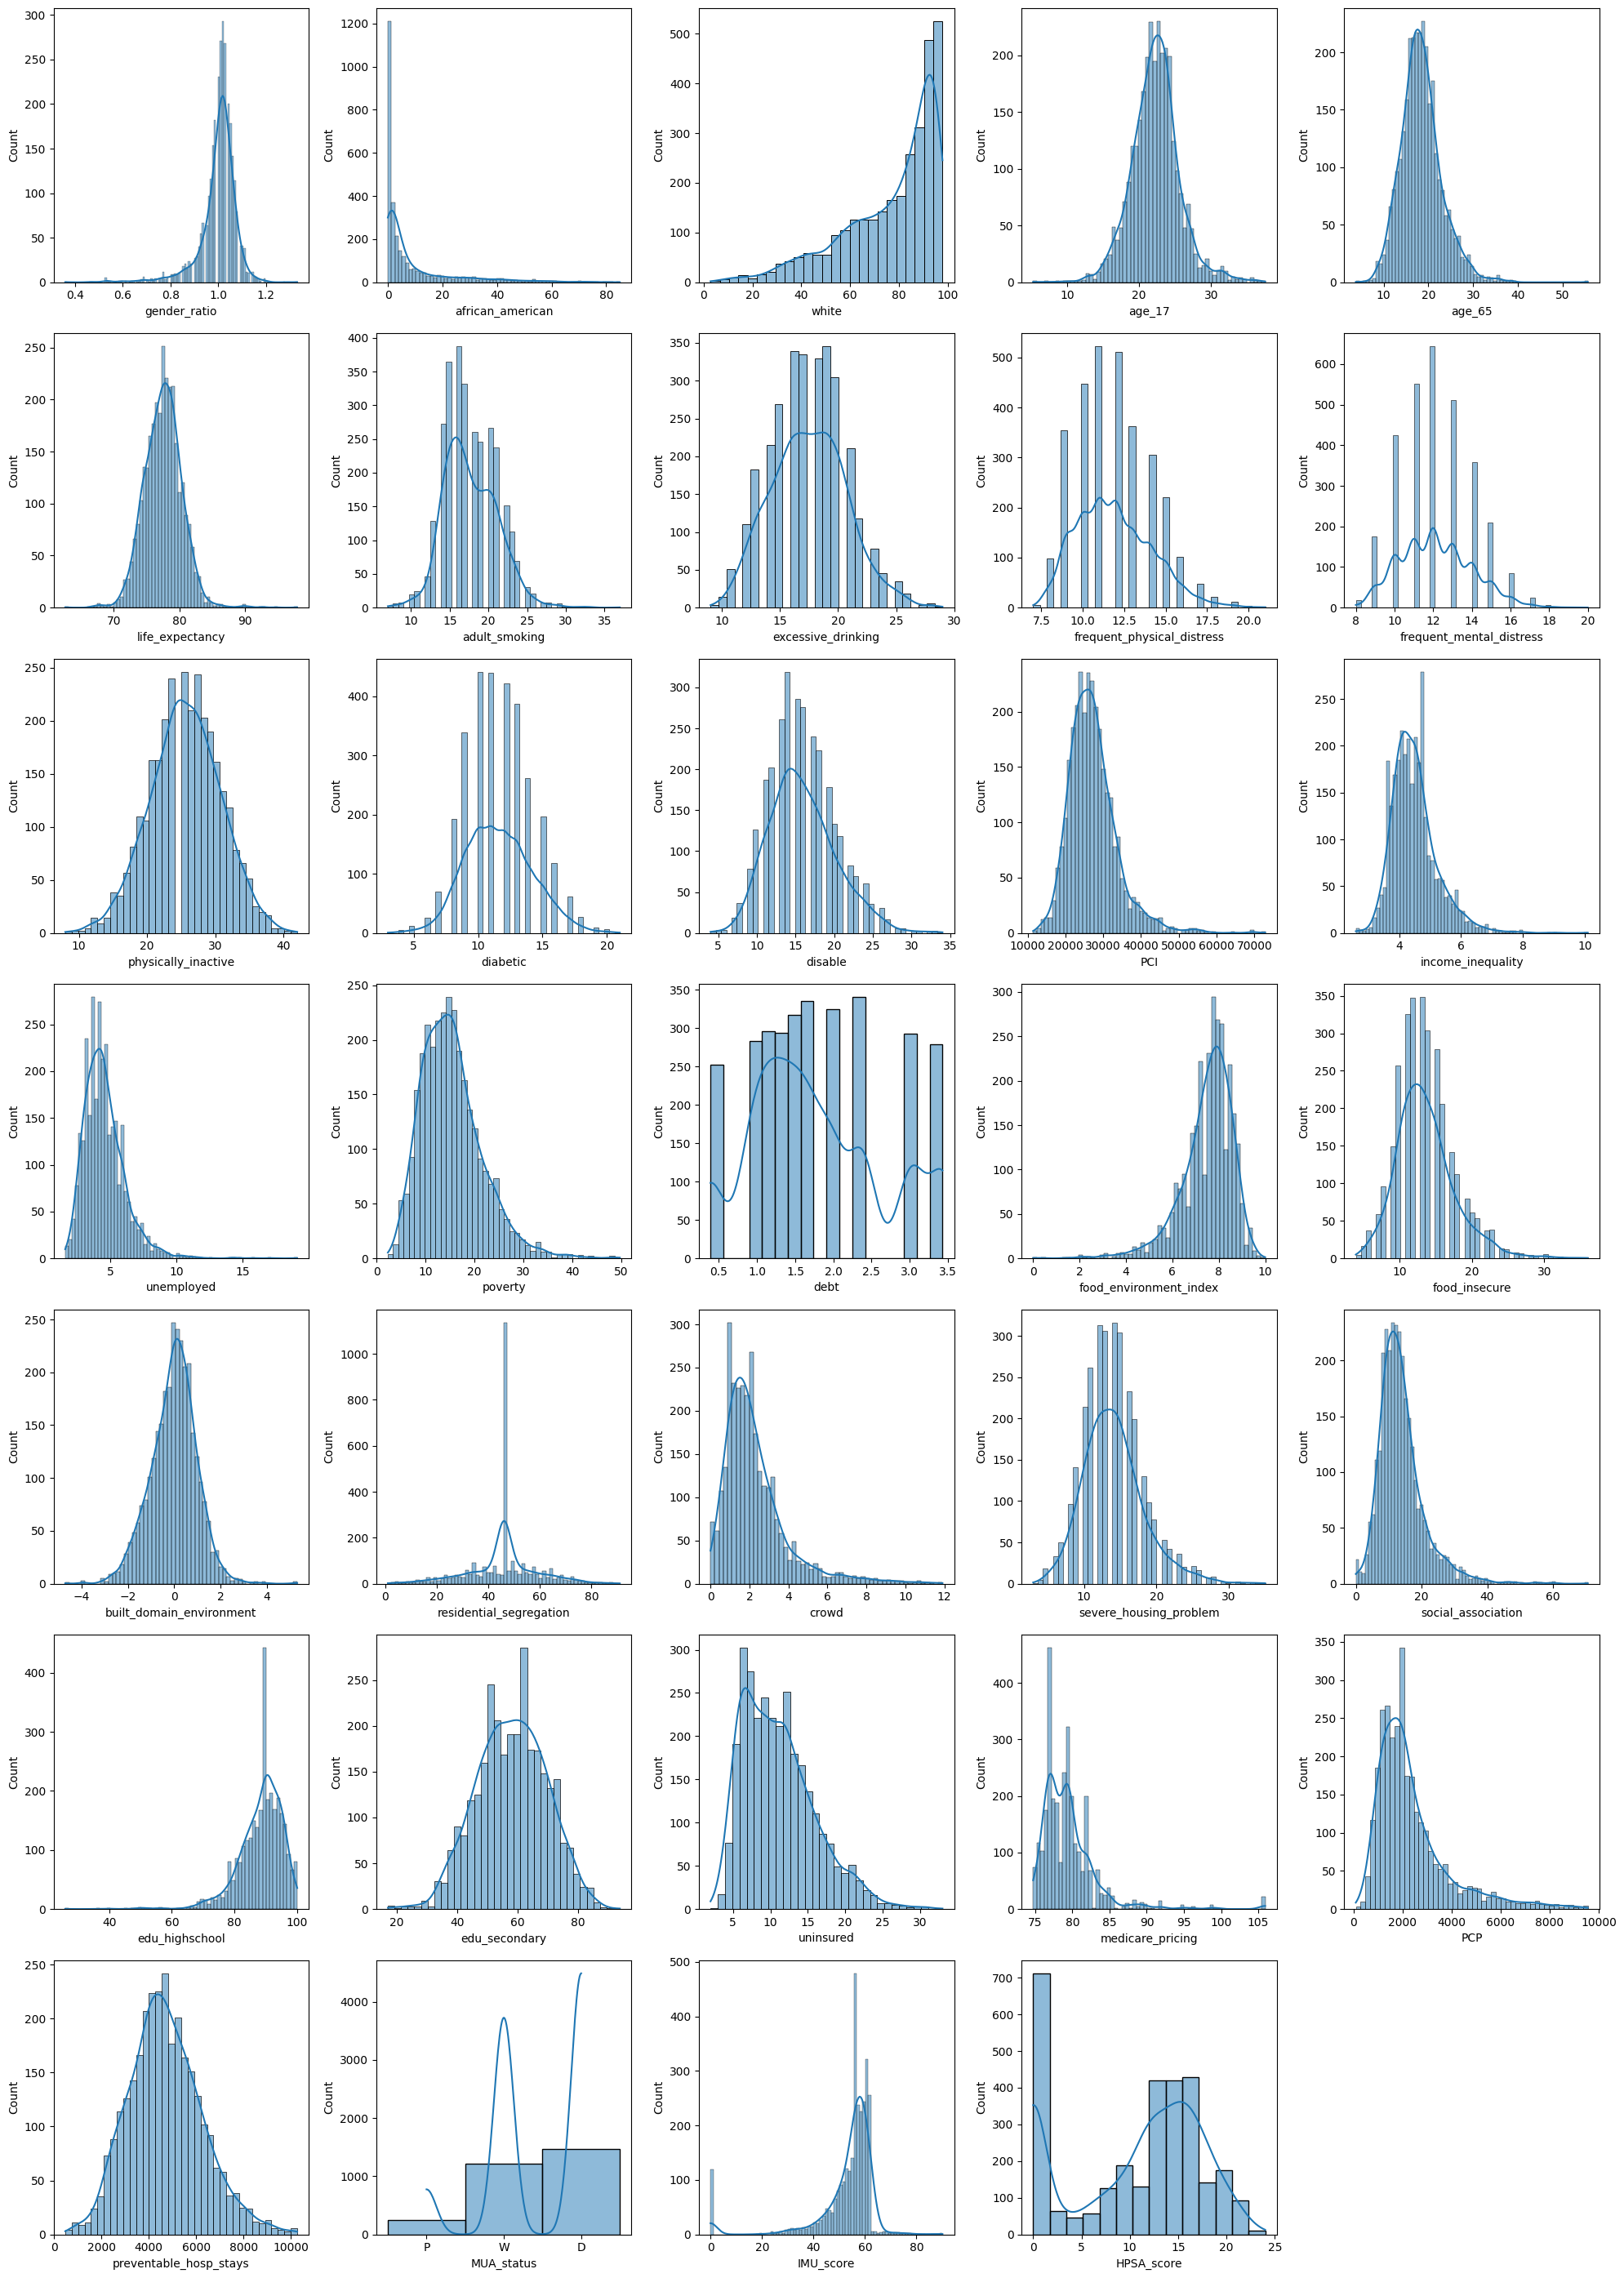

In [ ]:
subset1 = cancer_data.loc[:, 'gender_ratio':'HPSA_score']

n_features = len(subset1.columns)
n_cols = 5
n_rows = 7

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

# Remove empty graph
for i in range(n_features, n_rows*n_cols):
    fig.delaxes(axs.flatten()[i])

# Histograms
for i, column in enumerate(subset1.columns):
    r = i // n_cols
    c = i % n_cols
    ax = axs[r][c]
    sns.histplot(subset1[column], ax=ax, kde=True)

plt.tight_layout()
plt.show()


Spearman Correlation Matrix

<ipython-input-135-c2909f705f72>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = subset2.corr(method='spearman')


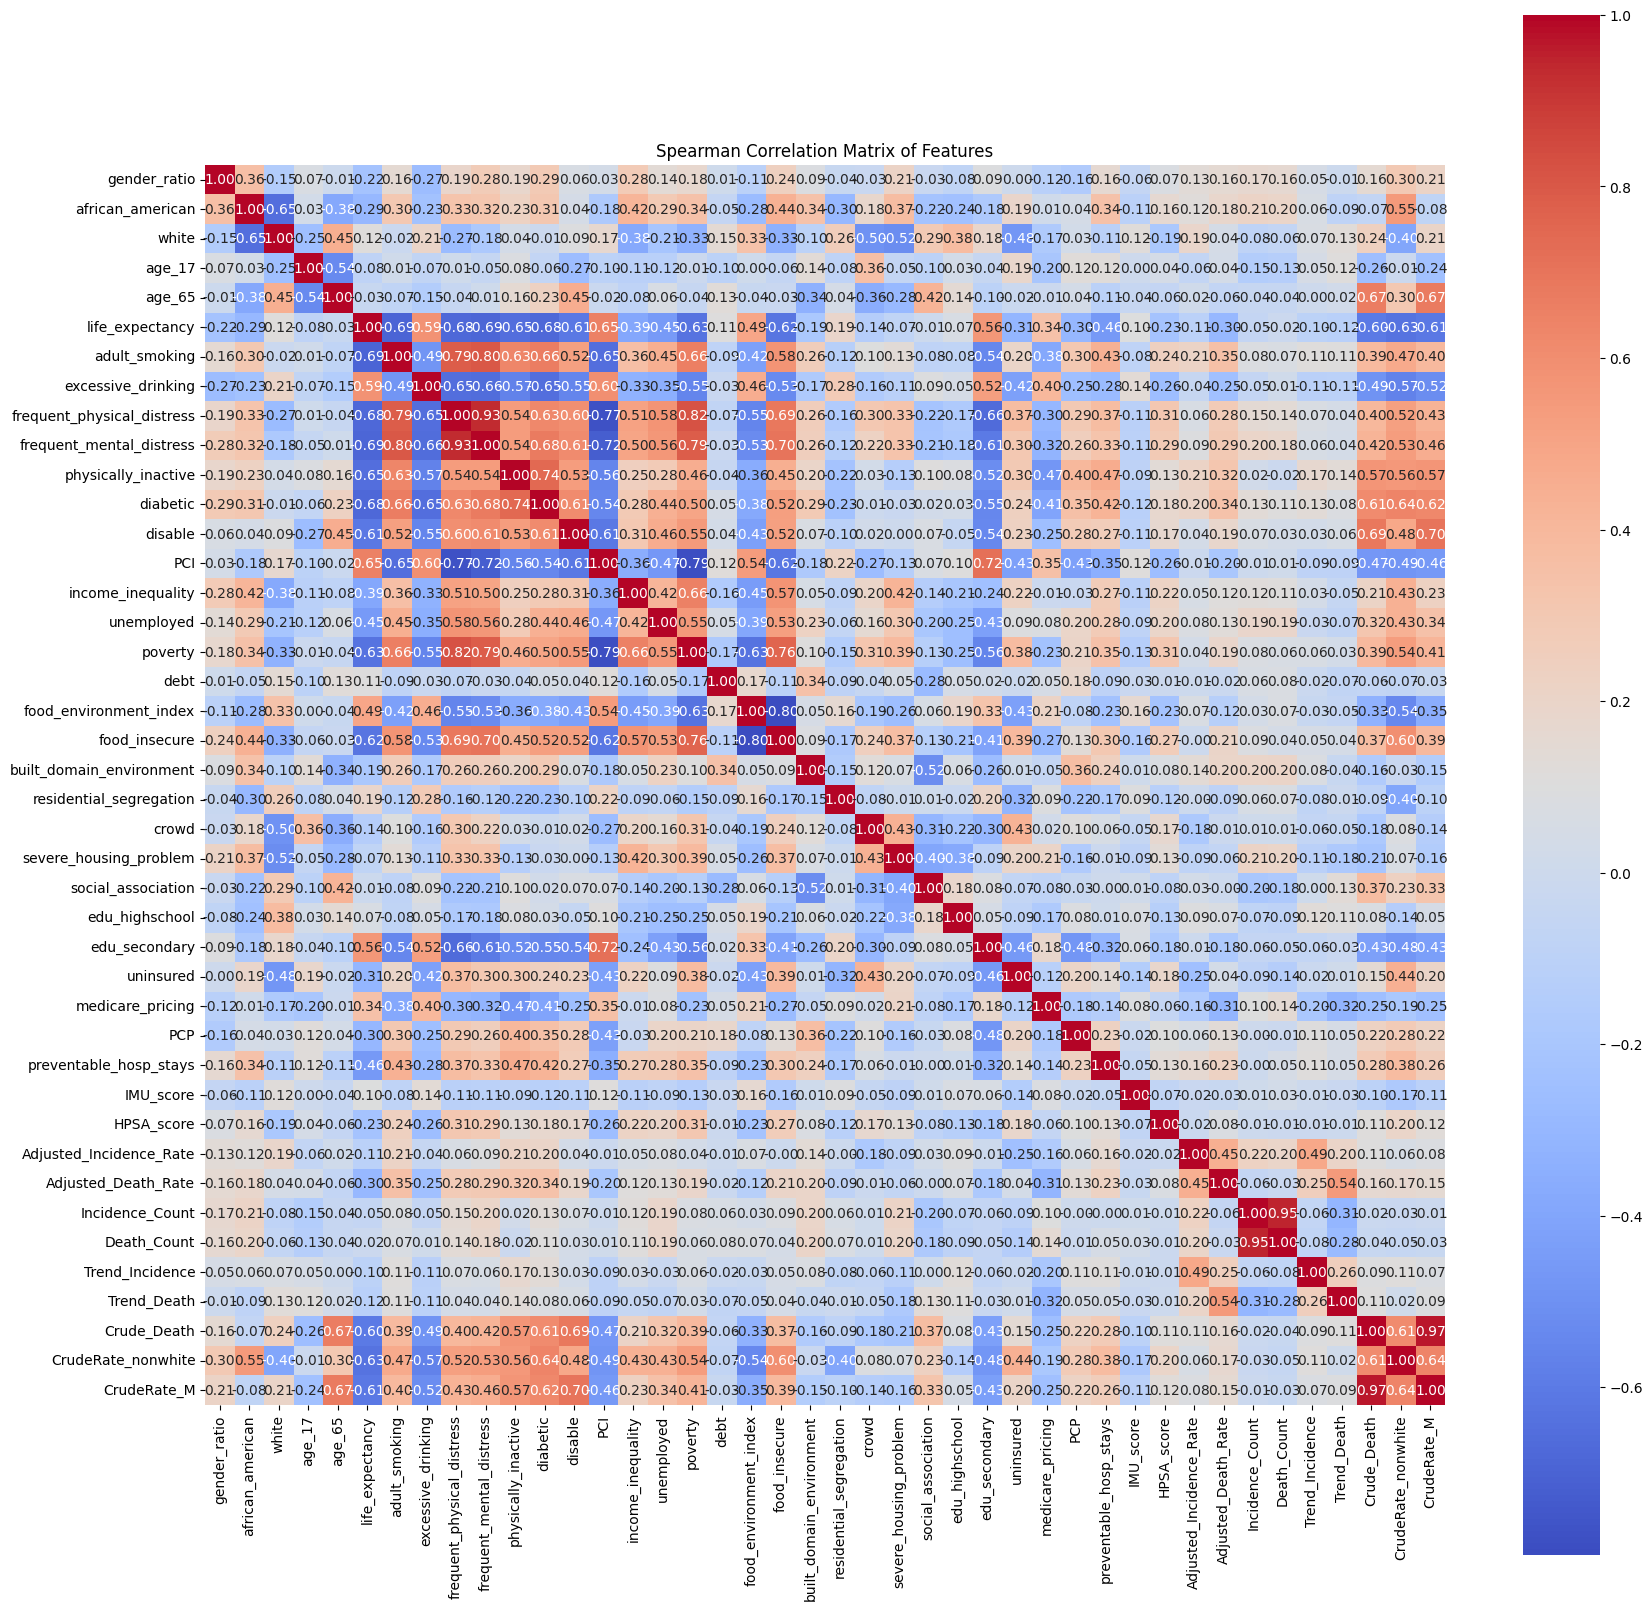

In [ ]:
spearman_corr = cancer_data.corr(method='spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix of Features')
plt.show()


Top Correlation Features

1.   *Adjusted Death Rate*
2.   *Crude death rate*



In [ ]:
features_to_exclude_1 = ['Adjusted_Incidence_Rate','Trend_Death','Crude_Death','CrudeRate_White', 'CrudeRate_nonwhite', 'CrudeRate_F', 'CrudeRate_M']
dataframe_filtered_1 = cancer_data.drop(columns=features_to_exclude_1)

spearman_corr_1 = dataframe_filtered_1.corr(method='spearman')
correlation_with_outcome_1 = spearman_corr_1['Adjusted_Death_Rate'].abs().sort_values(ascending=False)
correlation_with_outcome_1 = correlation_with_outcome_1.drop('Adjusted_Death_Rate')

top_correlations_with_outcome_1 = correlation_with_outcome_1.head(7)
print(top_correlations_with_outcome_1)


<ipython-input-128-9c29369cb44a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr_1 = dataframe_filtered_1.corr(method='spearman')


Adjusted_Incidence_Rate     0.452361
adult_smoking               0.354203
diabetic                    0.336766
physically_inactive         0.315849
medicare_pricing            0.313684
life_expectancy             0.296729
frequent_mental_distress    0.293655
Name: Adjusted_Death_Rate, dtype: float64


In [ ]:
features_to_exclude = ['Adjusted_Death_Rate', 'CrudeRate_White', 'CrudeRate_nonwhite', 'CrudeRate_F', 'CrudeRate_M']
dataframe_filtered = cancer_data.drop(columns=features_to_exclude)

spearman_corr = dataframe_filtered.corr(method='spearman')
correlation_with_outcome = spearman_corr['Crude_Death'].abs().sort_values(ascending=False)
correlation_with_outcome = correlation_with_outcome.drop('Crude_Death')

# top 7 correlation values with the outcome
top_correlations_with_outcome = correlation_with_outcome.head(6)
print(top_correlations_with_outcome)


<ipython-input-129-d0adac36dc4b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = dataframe_filtered.corr(method='spearman')


disable                0.686282
age_65                 0.670245
diabetic               0.611423
life_expectancy        0.599502
physically_inactive    0.571779
excessive_drinking     0.487395
Name: Crude_Death, dtype: float64


Correlation plot - *Crude Death Rate*

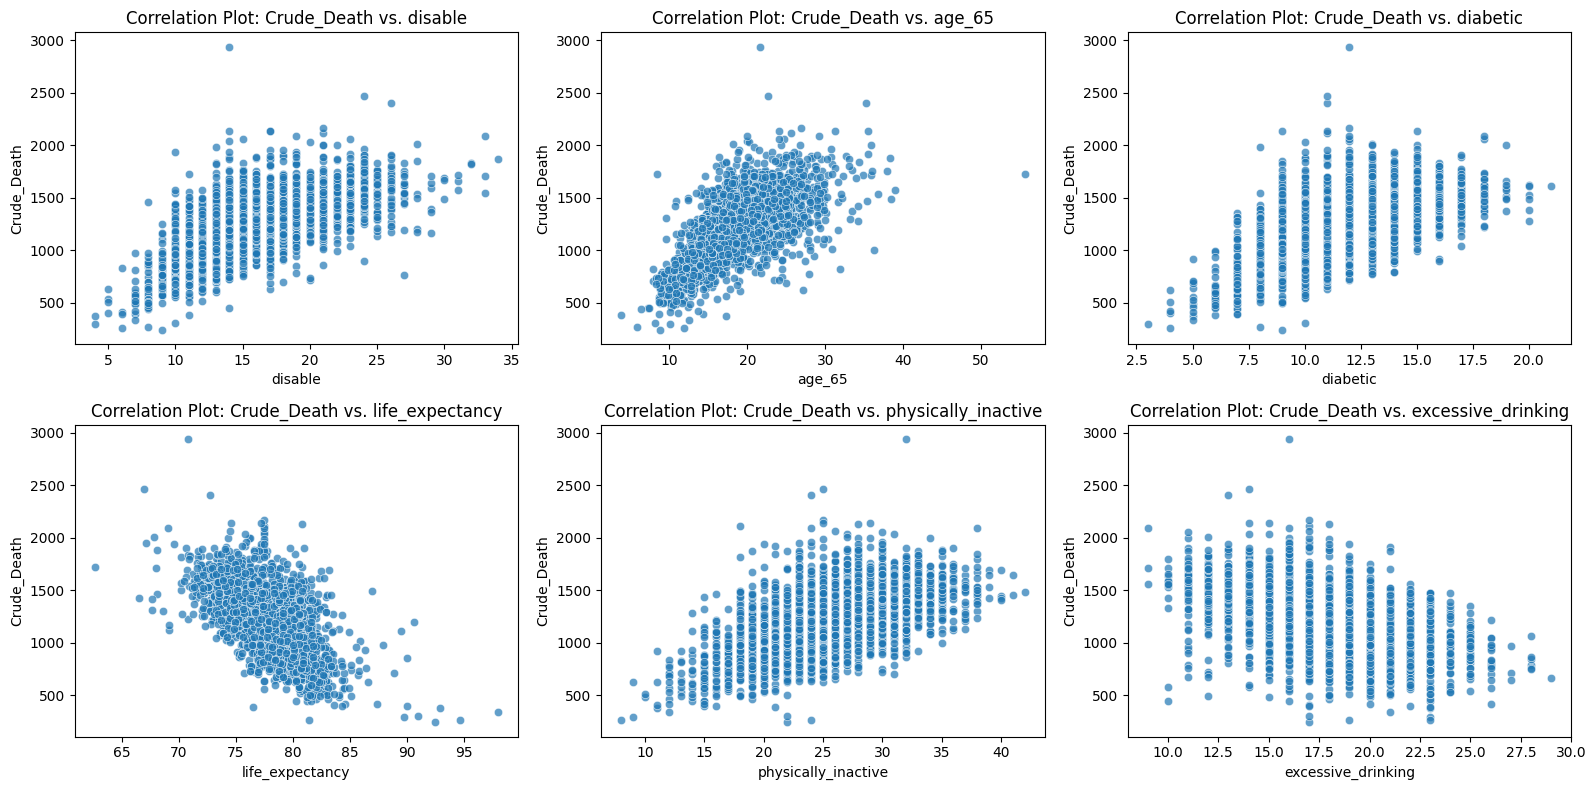

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
num_subplots = len(top_correlations_with_outcome)
axes = axes.flatten()

for idx, feature in enumerate(top_correlations_with_outcome.index):
    sns.scatterplot(x=dataframe_filtered[feature], y=dataframe_filtered['Crude_Death'], alpha=0.7, ax=axes[idx])
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Crude_Death')
    axes[idx].set_title(f'Correlation Plot: Crude_Death vs. {feature}')

for idx in range(num_subplots, len(axes)):
    axes[idx].axis('off')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


##Outcome Selection

### Adjusted_Incidence_Rate



Accuracy low, highest R^2= 0.19 from Random Forest Model, move to next outcome.

In [ ]:
#remove NA
cancer_data_1=cancer_data.dropna(subset=["Adjusted_Incidence_Rate"])
# Convert to float
cancer_data_1["Adjusted_Incidence_Rate"] = pd.to_numeric(cancer_data_1["Adjusted_Incidence_Rate"], errors='coerce')

<ipython-input-24-bd2ca0fac4ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data_1["Adjusted_Incidence_Rate"] = pd.to_numeric(cancer_data_1["Adjusted_Incidence_Rate"], errors='coerce')


In [ ]:
feature_1 = cancer_data_1.columns[cancer_data_1.columns.get_loc("gender_ratio"):cancer_data_1.columns.get_loc("HPSA_score")+1].tolist()
outcome_1 = "Adjusted_Incidence_Rate"

In [ ]:
X_1 = cancer_data_1[feature_1]
y_1 = cancer_data_1[outcome_1]

In [ ]:
# Apply one-hot encoding to "MUA_status"
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_1[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_1.index)
# adding to DataFrame with the encoded categories
X_1 = pd.concat([X_1.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_1= X_1.drop(["MUA_status_Missing"], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_1= X_1[~y_1.isna()]
y_1= y_1.dropna()
nan_in_features = X_1.isna().sum().sum()
nan_in_target = y_1.isna().sum()
(nan_in_features, nan_in_target)

(0, 0)

In [ ]:
X_1.shape, y_1.shape

((2664, 36), (2664,))

Model 1: Linear Regression

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
r2 = r2_score(y_test, preds_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 3664.6745683083286
Root Mean Squared Error: 60.53655563631225
Mean Absolute Error: 39.98614766693021
R-squared: 0.09405988947525135


Performance Baseline

In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)


Baseline MAE: 43.93823386214225
Baseline MSE: 4055.6240354101024


Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, preds_rf)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
r2 = r2_score(y_test, preds_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3412.294583609756
Root Mean Squared Error: 58.41484899928918
Mean Absolute Error: 38.047031894934335
R-squared: 0.1564504638551215


Model 3: Gradient Boosting

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best model obtained from the grid search
best_model = grid_gb.best_estimator_

# Make predictions on the test set using the best model
preds_gb = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
r2 = r2_score(y_test, preds_gb)

# Print the evaluation metrics
print("Best Parameters:", grid_gb.best_params_)
print("Best Mean Absolute Error:", -grid_gb.best_score_)  # Negative because of 'neg_mean_absolute_error'

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Mean Absolute Error: 38.91588164363933
Mean Squared Error: 3515.4107019786034
Root Mean Squared Error: 59.29089898102915
Mean Absolute Error: 38.70756280318597
R-squared: 0.1309592433031478


Model 4: Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Neural Network model
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=0, max_iter=500)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)


Mean Squared Error: 3515.4107019786034
Root Mean Squared Error: 62.61433987293969
Mean Absolute Error: 42.11730026856614
R-squared: 0.030803835626129206


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,best_model,model_nn]

model_names =["linear regression","random forest","gardiant boosting","neuro network"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_Adjusted_Incidence_Rate.csv', index=False)


### Adjusted_Death_Rate

Accuracy low, highest R^2=0.17 from Gradient Boosting model, move to next outcome

In [ ]:
cancer_data_2=cancer_data.dropna(subset=["Adjusted_Death_Rate"])
outcome_2 = "Adjusted_Death_Rate"
feature_2 = cancer_data_2.columns[cancer_data_1.columns.get_loc("gender_ratio"):cancer_data_1.columns.get_loc("HPSA_score")+1].tolist()

X_2 = cancer_data_2[feature_2]
y_2 = cancer_data_2[outcome_2]

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_2[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_2.index)

X_2 = pd.concat([X_2.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_2= X_2.drop(["MUA_status_Missing"], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_2= X_2[~y_2.isna()]
y_2= y_2.dropna()

nan_in_features = X_2.isna().sum().sum()
nan_in_target = y_2.isna().sum()
(nan_in_features, nan_in_target)

X_2.shape, y_2.shape

((2960, 36), (2960,))

Linear Regression model

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
r2 = r2_score(y_test, preds_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 743.9763720747102
Root Mean Squared Error: 27.275930269648185
Mean Absolute Error: 19.22641830949016
R-squared: 0.08964723485996118


Performance Baseline

In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)


Baseline MAE: 20.809989613769172
Baseline MSE: 828.4446112368177


 Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

model_rf = RandomForestRegressor(n_estimators=200, random_state=0)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
r2 = r2_score(y_test, preds_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 715.8203065912161
Root Mean Squared Error: 26.754818380830322
Mean Absolute Error: 18.558015202702702
R-squared: 0.12409987748473117


Gradient Boosting model

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

best_model = grid_gb.best_estimator_
preds_gb = best_model.predict(X_test)

mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
r2 = r2_score(y_test, preds_gb)

print("Best Parameters:", grid_gb.best_params_)
print("Best Mean Absolute Error:", -grid_gb.best_score_)  # Negative because of 'neg_mean_absolute_error'

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Mean Absolute Error: 18.153121490689223
Mean Squared Error: 714.0460472867749
Root Mean Squared Error: 26.721640056081416
Mean Absolute Error: 18.45621740121872
R-squared: 0.12627091667965773


Neural Network

In [ ]:
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

# Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=0, max_iter=200)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 714.0460472867749
Root Mean Squared Error: 28.07729406531354
Mean Absolute Error: 19.75217768961173
R-squared: 0.03536931266258647


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression tasks

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


19/19 [==============================] - 0s 2ms/step
Mean Squared Error: 795.5702915319221
Root Mean Squared Error: 28.20585562488616
Mean Absolute Error: 20.149567163312756
R-squared: 0.026515300829173638


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,best_model,model_nn]

model_names =["linear regression","random forest","gardiant boosting","neuro network"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_Adjusted_Death_Rate.csv', index=False)


### Crude_Death
Features performs well, high accracy with no overfitting. Result will be used for dashboard building.

Almost all models has accuracy higher than 0.85.

Baseline MSE = 107160.204 and Baseline MAE= 255.819

In [ ]:
cancer_data_3=cancer_data.dropna(subset=["Crude_Death"])
outcome_3 = "Crude_Death"
feature_3 = cancer_data_3.columns[cancer_data_3.columns.get_loc("gender_ratio"):cancer_data_3.columns.get_loc("HPSA_score")+1].tolist()

X_3 = cancer_data_3[feature_3]
y_3 = cancer_data_3[outcome_3]

In [ ]:
feature_3

['gender_ratio',
 'african_american',
 'white',
 'age_17',
 'age_65',
 'life_expectancy',
 'adult_smoking',
 'excessive_drinking',
 'frequent_physical_distress',
 'frequent_mental_distress',
 'physically_inactive',
 'diabetic',
 'disable',
 'PCI',
 'income_inequality',
 'unemployed',
 'poverty',
 'debt',
 'food_environment_index',
 'food_insecure',
 'built_domain_environment',
 'residential_segregation',
 'crowd',
 'severe_housing_problem',
 'social_association',
 'edu_highschool',
 'edu_secondary',
 'uninsured',
 'medicare_pricing',
 'PCP',
 'preventable_hosp_stays',
 'MUA_status',
 'IMU_score',
 'HPSA_score']

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_3[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_3.index)
X_3 = pd.concat([X_3.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_3= X_3.drop(["MUA_status_Missing"], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_3= X_3[~y_3.isna()]
y_3= y_3.dropna()

nan_in_features = X_3.isna().sum().sum()
nan_in_target = y_3.isna().sum()
(nan_in_features, nan_in_target),(X_3.shape, y_3.shape)

((0, 0), ((3006, 36), (3006,)))

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_3 = scaler.fit_transform(X_3)

Linear Regression

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=22)
n = X_test.shape[0]
p = X_test.shape[1]

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
explained_variance = explained_variance_score(y_test, preds_lr)

r2 = r2_score(y_test, preds_lr)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error:", round(mse,4))
print("Root Mean Squared Error:", round(rmse,4))
print("Mean Absolute Error:", round(mae,4))
print("Mean Absolute Error:", round(mae,4))
print("Explained Variance Score:", round(explained_variance,4))

print("R-squared:", round(r2,4))
print("Adjusted R-squared:", round(adjusted_r2,4))


Mean Squared Error: 15147.2455
Root Mean Squared Error: 123.0741
Mean Absolute Error: 82.9487
Mean Absolute Error: 82.9487
Explained Variance Score: 0.8278
R-squared: 0.8278
Adjusted R-squared: 0.8168


In [ ]:
print("Actual values:", y_test)
print("Predicted values:", preds_lr)

Actual values: 2815    1293.5
1525    1763.9
473     1401.6
1727    1690.5
2384    1921.0
         ...  
1193    1433.5
54      1161.6
887     1476.6
371     1328.4
1439    1504.1
Name: Crude_Death, Length: 602, dtype: float64
Predicted values: [1299.80744876 1895.62295945 1406.326497   1472.12800144 1674.63742257
 1437.26434378  862.75734324  647.43865279 1272.53730758  949.34309626
 1360.59679535 1328.89276956 1750.10632472 1338.07517914  969.89120735
  675.05219332 1511.90290068 1157.31723818 1553.30427812 1381.92560183
 1102.85157211 1311.01721568 1934.48524601 1489.82567092 1406.42220927
 1289.14120131 1381.31625008 1506.84455531 1265.9348091   458.15880765
 1294.4272973  1176.55690587 1024.54365451 1310.26336124  984.69609796
 1336.88173617 1590.30583308 1517.66789444 1450.13888291 1522.97111691
  781.7412505  1503.11769182 1235.63963086 1366.61510698 1312.56258006
 1164.16328911 1637.88436142 1497.70898736 1196.18358659 1372.34161792
 1100.60472202  961.23550621 1052.39788781 11

store real value and prediction value

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': preds_lr})
df.to_csv('actual_vs_predicted_lr.csv', index=False)

store evaluation

Check overfitting

In [ ]:
preds_train = model_lr.predict(X_train)
preds_test = model_lr.predict(X_test)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

r2_train = r2_score(y_train, preds_train)
r2_test = r2_score(y_test, preds_test)

print(f'Training MSE: {round(mse_train,4)}, R2 Score: {round(r2_train,4)}')
print(f'Test MSE: {round(mse_test,4)}, R2 Score: {round(r2_test,4)}')


Training MSE: 13229.4076, R2 Score: 0.8563
Test MSE: 15147.2455, R2 Score: 0.8278


Performance baseline

In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)

print("Baseline MSE:", round(baseline_mse,3))
print("Baseline MAE:", round(baseline_mae,3))


Baseline MSE: 88118.846
Baseline MAE: 237.761


 Random Forest

In [ ]:
# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, random_state=24)
n = X_test.shape[0]
p = X_test.shape[1]

model_rf = RandomForestRegressor(n_estimators=135, random_state=42)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
explained_variance = explained_variance_score(y_test, preds_rf)

r2 = r2_score(y_test, preds_rf)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error:", round(mse,4))
print("Root Mean Squared Error:", round(rmse,4))
print("Mean Absolute Error:", round(mae,4))
print("Mean Absolute Error:", round(mae,4))
print("Explained Variance Score:", round(explained_variance,4))

print("R-squared:", round(r2,4))
print("Adjusted R-squared:", round(adjusted_r2,4))


Mean Squared Error: 15800.2666
Root Mean Squared Error: 125.6991
Mean Absolute Error: 83.1648
Mean Absolute Error: 83.1648
Explained Variance Score: 0.8284
R-squared: 0.8284
Adjusted R-squared: 0.8213


In [ ]:
#check overfitting
preds_train = model_rf.predict(X_train)
preds_test = model_rf.predict(X_test)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

r2_train = r2_score(y_train, preds_train)
r2_test = r2_score(y_test, preds_test)

print(f'Training MSE: {round(mse_train,4)}, R2 Score: {round(r2_train,4)}')
print(f'Test MSE: {round(mse_test,4)}, R2 Score: {round(r2_test,4)}')


Training MSE: 2027.4788, R2 Score: 0.9777
Test MSE: 15800.2666, R2 Score: 0.8284


model overfitting optimizing model

In [ ]:
preds_train = model_rf.predict(X_train)

# Calculate metrics for the training data
mse_train = mean_squared_error(y_train, preds_train)
mae_train = mean_absolute_error(y_train, preds_train)
r2_train = r2_score(y_train, preds_train)

# Calculate metrics for the test data
mse_test = mean_squared_error(y_test, preds_rf)
mae_test = mean_absolute_error(y_test, preds_rf)
r2_test = r2_score(y_test, preds_rf)

# Print the metrics
print(f'Training MSE: {mse_train}, MAE: {mae_train}, R^2 Score: {r2_train}')
print(f'Test MSE: {mse_test}, MAE: {mae_test}, R^2 Score: {r2_test}')


Training MSE: 2027.4788240391263, MAE: 30.70430115476696, R^2 Score: 0.9776919077681394
Test MSE: 15800.266584314082, MAE: 83.16479510552682, R^2 Score: 0.8284337275892608


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Extra Trees model
model_et = ExtraTreesRegressor(n_estimators=135, random_state=42)
model_et.fit(X_train, y_train)
preds_et = model_et.predict(X_test)

# Calculate metrics for Extra Trees model
mse_et = mean_squared_error(y_test, preds_et)
print(f'Extra Trees Test MSE: {mse_et}')


Extra Trees Test MSE: 16526.881335373


In [ ]:
# Define the base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=135, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=135, random_state=42)),
    ('svr', SVR())
]

# Create the stacking model
model_stacking = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
model_stacking.fit(X_train, y_train)
preds_stacking = model_stacking.predict(X_test)

# Calculate metrics for Stacking model
mse_stacking = mean_squared_error(y_test, preds_stacking)
rmse_stacking = sqrt(mse_stacking)
mae_stacking = mean_absolute_error(y_test, preds_stacking)
explained_variance_stacking = explained_variance_score(y_test, preds_stacking)
r2_stacking = r2_score(y_test, preds_stacking)
adjusted_r2_stacking = 1 - (1-r2_stacking)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Print the metrics
print('\nStacking Metrics:')
print("Mean Squared Error:", round(mse_stacking,4))
print("Root Mean Squared Error:", round(rmse_stacking,4))
print("Mean Absolute Error:", round(mae_stacking,4))
print("Explained Variance Score:", round(explained_variance_stacking,4))
print("R-squared:", round(r2_stacking,4))
print("Adjusted R-squared:", round(adjusted_r2_stacking,4))


Stacking Metrics:
Mean Squared Error: 15362.4178
Root Mean Squared Error: 123.9452
Mean Absolute Error: 81.4645
Explained Variance Score: 0.8332
R-squared: 0.8332
Adjusted R-squared: 0.8262


In [ ]:
#check model_stacking overfitting
preds_train = model_stacking.predict(X_train)
preds_test = model_stacking.predict(X_test)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

r2_train = r2_score(y_train, preds_train)
r2_test = r2_score(y_test, preds_test)

print(f'Training MSE: {round(mse_train,4)}, R2 Score: {round(r2_train,4)}')
print(f'Test MSE: {round(mse_test,4)}, R2 Score: {round(r2_test,4)}')


Training MSE: 456.6584, R2 Score: 0.995
Test MSE: 15362.4178, R2 Score: 0.8332


model still overfitting

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("Best parameters found: ",random_search.best_params_)
print("Best model found: ",random_search.best_estimator_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best model found:  RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=400,
                      random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, random_state=24)
n = X_test.shape[0]
p = X_test.shape[1]

best_model_rf = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=20, bootstrap=True, random_state=42)
best_model_rf.fit(X_train, y_train)

preds_brf = best_model_rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds_brf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_brf)
explained_variance = explained_variance_score(y_test, preds_brf)

r2 = r2_score(y_test, preds_brf)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error:", round(mse,4))
print("Root Mean Squared Error:", round(rmse,4))
print("Mean Absolute Error:", round(mae,4))
print("Mean Absolute Error:", round(mae,4))
print("Explained Variance Score:", round(explained_variance,4))

print("R-squared:", round(r2,4))
print("Adjusted R-squared:", round(adjusted_r2,4))

Mean Squared Error: 15864.9458
Root Mean Squared Error: 125.9561
Mean Absolute Error: 83.1495
Mean Absolute Error: 83.1495
Explained Variance Score: 0.8278
R-squared: 0.8277
Adjusted R-squared: 0.8206


In [ ]:
#check model_stacking overfitting
preds_train = best_model_rf.predict(X_train)
preds_test = best_model_rf.predict(X_test)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

r2_train = r2_score(y_train, preds_train)
r2_test = r2_score(y_test, preds_test)

print(f'Training MSE: {round(mse_train,4)}, R2 Score: {round(r2_train,4)}')
print(f'Test MSE: {round(mse_test,4)}, R2 Score: {round(r2_test,4)}')

Training MSE: 2512.2756, R2 Score: 0.9724
Test MSE: 15864.9458, R2 Score: 0.8277


overfitting move to next model

Elastic Net Regression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)
pred_en = elastic_net.predict(X_test)

n = X_test.shape[0]
p = X_test.shape[1]


# Evaluation metrics
mse = mean_squared_error(y_test, pred_en)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_en)
explained_variance = explained_variance_score(y_test, pred_en)

r2 = r2_score(y_test, pred_en)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error:", round(mse,4))
print("Root Mean Squared Error:", round(rmse,4))
print("Mean Absolute Error:", round(mae,4))
print("Mean Absolute Error:", round(mae,4))
print("Explained Variance Score:", round(explained_variance,4))

print("R-squared:", round(r2,4))
print("Adjusted R-squared:", round(adjusted_r2,4))

Mean Squared Error: 12509.7562
Root Mean Squared Error: 111.847
Mean Absolute Error: 79.9399
Mean Absolute Error: 79.9399
Explained Variance Score: 0.8633
R-squared: 0.8633
Adjusted R-squared: 0.8546


In [ ]:
#check model_stacking overfitting
preds_train = elastic_net.predict(X_train)
preds_test = elastic_net.predict(X_test)

mse_train = mean_squared_error(y_train, preds_train)
mse_test = mean_squared_error(y_test, preds_test)

r2_train = r2_score(y_train, preds_train)
r2_test = r2_score(y_test, preds_test)

print(f'Training MSE: {round(mse_train,4)}, R2 Score: {round(r2_train,4)}')
print(f'Test MSE: {round(mse_test,4)}, R2 Score: {round(r2_test,4)}')

Training MSE: 13180.8896, R2 Score: 0.855
Test MSE: 15171.884, R2 Score: 0.8353


Gradient Boosting

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best model obtained from the grid search
best_model = grid_gb.best_estimator_

# Make predictions on the test set using the best model
preds_gb = best_model.predict(X_test)

n = X_test.shape[0]
p = X_test.shape[1]


# Evaluation metrics
mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
explained_variance = explained_variance_score(y_test, preds_gb)

r2 = r2_score(y_test, preds_gb)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error:", round(mse,4))
print("Root Mean Squared Error:", round(rmse,4))
print("Mean Absolute Error:", round(mae,4))
print("Mean Absolute Error:", round(mae,4))
print("Explained Variance Score:", round(explained_variance,4))

print("R-squared:", round(r2,4))
print("Adjusted R-squared:", round(adjusted_r2,4))

Mean Squared Error: 15889.5998
Root Mean Squared Error: 126.054
Mean Absolute Error: 81.8614
Mean Absolute Error: 81.8614
Explained Variance Score: 0.8275
R-squared: 0.8275
Adjusted R-squared: 0.8203


Neural Network

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_nn = model.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


19/19 [==============================] - 0s 2ms/step
Mean Squared Error: 16086.758560528662
Root Mean Squared Error: 126.8335860903123
Mean Absolute Error: 94.22604088260486
R-squared: 0.8242196100080663


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,model_stacking,elastic_net,best_model,model]

model_names =["linear regression","random forest","stacking random forest","elastic net","gardiant boosting","neuro network"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_cruded_death.csv', index=False)


store feature importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error


# Define custom scoring function
def keras_scoring_func(estimator, X, y):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y, y_pred)


all_feature_importances = []


if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns.tolist()
else:
    feature_names = [f'feature_{i}' for i in range(X_test.shape[1])]

for model, model_name in zip(models, model_names):
    # Extract feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = abs(model.coef_)
    elif model_name == "stacking random forest":
        feature_importances = []
        for name, est in model.named_estimators_.items():
            if hasattr(est, 'feature_importances_'):
                feature_importances.append(est.feature_importances_)
            else:
                feature_importances.append([np.nan]*len(feature_names))
        feature_importances = np.mean(feature_importances, axis=0)
    elif model_name == "neural network":
        # Compute permutation importance with custom scoring function
        perm_importance = permutation_importance(model, X_test, y_test, scoring=keras_scoring_func, n_repeats=10, random_state=0)
        feature_importances = perm_importance.importances_mean
    else:
        feature_importances = [np.nan] * len(feature_names)

    all_feature_importances.append([model_name] + list(feature_importances))


feature_importance_df = pd.DataFrame(all_feature_importances, columns=['Model'] + feature_names)

# Save to CSV
feature_importance_df.to_csv('model_feature_importances_cruded_death.csv', index=False)


29/29 [==============================] - 0s 2ms/step


In [ ]:
print(f"Number of features in train set: {X_train.shape[1]}")
print(f"Number of features in test set: {X_test.shape[1]}")


Number of features in train set: 36
Number of features in test set: 36


In [ ]:
print(f"{model_name} metrics: {metrics}")
print(f"{model_name} feature importances: {feature_importances}")


neural network metrics: [15362.417795151418, 123.94522094518778, 81.46451343882397, 0.8331883121882503, 0.8331880831082221, 0.826245621827177]
neural network feature importances: [ 1.82000701e-03  4.23726116e-04  1.02161747e-03  4.66214944e-04
  5.91428156e-01  2.48548228e-01 -1.34593106e-04  2.30815592e-03
  1.52186844e-04 -9.18091154e-05  1.36692422e-02  1.20190429e-02
  2.39737938e-02  1.35843590e-03 -4.85785879e-05  1.13807614e-03
  4.16786589e-04  2.90532346e-03  8.13182082e-05  3.28317527e-04
  5.65553737e-03  8.69928528e-05  9.42832553e-04  2.63429378e-03
  1.63451453e-02  3.70582057e-05  3.11934913e-04  1.06615517e-03
 -3.93475340e-06  3.02723273e-04  1.92230522e-03 -5.13319055e-04
 -3.67235912e-04  5.13582090e-04  2.98767462e-04  5.07939888e-04]


In [ ]:
# List to store metrics and feature importances from all models
all_metrics = []
all_feature_importances = []
models =[model_lr, model_rf, model_stacking, elastic_net, best_model, model]
model_names =["linear regression","random forest","stacking random forest","elastic net","gradient boosting","neural network"]

feature_names = ['gender_ratio', 'african_american',
       'white', 'age_17', 'age_65', 'life_expectancy', 'adult_smoking',
       'excessive_drinking', 'frequent_physical_distress',
       'frequent_mental_distress', 'physically_inactive', 'diabetic',
       'disable', 'PCI', 'income_inequality', 'unemployed', 'poverty', 'debt',
       'food_environment_index', 'food_insecure', 'built_domain_environment',
       'residential_segregation', 'crowd', 'severe_housing_problem',
       'social_association', 'edu_highschool', 'edu_secondary', 'uninsured',
       'medicare_pricing', 'PCP', 'preventable_hosp_stays', 'MUA_status_D',
'MUA_status_P','MUA_status_W','IMU_score', 'HPSA_score']
for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)


    # Extract feature importances if available
    if model_name in ["random forest", "gradient boosting"]:
        feature_importances = model.feature_importances_
    elif model_name in ["linear regression", "elastic net"]:
        feature_importances = abs(model.coef_)
    else:
        r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)
        feature_importances = r.importances_mean

    all_feature_importances.append([model_name] + list(feature_importances))

# Convert to DataFrame
feature_importance_df = pd.DataFrame(all_feature_importances, columns=['Model'] + feature_names)

# Save to CSV
feature_importance_df.to_csv('model_feature_importances_crude_death.csv', index=False)


### Crude Rate white

In [ ]:
# Replace "Unreliable" with "NA" in the "CrudeRate_White" column
cancer_data_4=cancer_data.dropna(subset=["CrudeRate_White"])
cancer_data_4['CrudeRate_White'] = pd.to_numeric(cancer_data_4['CrudeRate_White'], errors='coerce')

count    2999.000000
mean     1298.301734
std       323.484024
min       271.300000
25%      1079.150000
50%      1306.900000
75%      1512.950000
max      2934.000000
Name: CrudeRate_White, dtype: float64

In [ ]:
outcome_4 = "CrudeRate_White"
feature_4 = cancer_data_4.columns[cancer_data_1.columns.get_loc("gender_ratio"):cancer_data_1.columns.get_loc("HPSA_score")+1].tolist()
columns_to_drop = ['african_american', 'white']
for col in columns_to_drop:
    if col in feature_4:
        feature_4.remove(col)

X_4 = cancer_data_4[feature_4]
y_4 = cancer_data_4[outcome_4]

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_4[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_4.index)
X_4 = pd.concat([X_4.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_4= X_4.drop(["MUA_status_Missing"], axis=1)
X_4= X_4[~y_4.isna()]
y_4= y_4.dropna()

nan_in_features = X_4.isna().sum().sum()
nan_in_target = y_4.isna().sum()
(nan_in_features, nan_in_target)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0, 0)

In [ ]:
X_4.shape, y_4.shape

((2999, 34), (2999,))

Linear Regression

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=0)

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
r2 = r2_score(y_test, preds_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 17535.056376854696
Root Mean Squared Error: 132.41999991260647
Mean Absolute Error: 94.36713557410332
R-squared: 0.8157795918013526


In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)


Baseline MAE: 244.4102816451299
Baseline MSE: 95889.53855973334


 Random Forest

In [ ]:
# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=0)

model_rf = RandomForestRegressor(n_estimators=180, random_state=40)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
r2 = r2_score(y_test, preds_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 17305.214442858553
Root Mean Squared Error: 131.54928522367027
Mean Absolute Error: 91.0466120370371
R-squared: 0.8181942732253499


Gradient Boosting

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best model obtained from the grid search
best_model = grid_gb.best_estimator_

# Make predictions on the test set using the best model
preds_gb = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
r2 = r2_score(y_test, preds_gb)

# Print the evaluation metrics
print("Best Parameters:", grid_gb.best_params_)
print("Best Mean Absolute Error:", -grid_gb.best_score_)  # Negative because of 'neg_mean_absolute_error'

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Parameters: {'max_depth': 3, 'n_estimators': 200}
Best Mean Absolute Error: 95.56614278165078
Mean Squared Error: 16297.994424215047
Root Mean Squared Error: 127.66359866545767
Mean Absolute Error: 88.05674453291738
R-squared: 0.8287759605032575


Neural Network

In [ ]:
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

# Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=1, max_iter=200)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 16297.994424215047
Root Mean Squared Error: 185.24244561813654
Mean Absolute Error: 140.89678277564906
R-squared: 0.6379605542626275


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_4)

covariance_matrix = np.cov(standardized_data.T)


eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

n_components = 10
selected_eigenvectors = eigenvectors[:, :n_components]

transformed_data_1 = np.dot(standardized_data, selected_eigenvectors)



In [ ]:
results = {}
X_train, X_test, y_train, y_test = train_test_split(transformed_data_1, y_4, test_size=0.3, random_state=0)

# Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=1, max_iter=200)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 16297.994424215047
Root Mean Squared Error: 217.613179301605
Mean Absolute Error: 164.61512444491538
R-squared: 0.5003737276260631


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,best_model]
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

model_names =["linear regression","random forest","gardiant boosting"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_CrudeRate_White.csv', index=False)


### Crude Rate Non-white
Too many missing data, accuracy low, highest R^2= 0.23 from Linear Regression model.

In [ ]:
cancer_data["CrudeRate_nonwhite"] = cancer_data["CrudeRate_nonwhite"].replace("Unreliable", " ")
cancer_data_5=cancer_data.dropna(subset=["CrudeRate_nonwhite"])
cancer_data['CrudeRate_nonwhite'].describe()

count     1962.000000
mean       759.359378
std        443.547367
min         98.500000
25%        454.425000
50%        706.000000
75%       1020.325000
max      11879.400000
Name: CrudeRate_nonwhite, dtype: float64

In [ ]:
outcome_5 = "CrudeRate_nonwhite"
feature_5 = cancer_data_5.columns[cancer_data_1.columns.get_loc("gender_ratio"):cancer_data_1.columns.get_loc("HPSA_score")+1].tolist()
columns_to_drop = ['african_american', 'white']
for col in columns_to_drop:
    if col in feature_5:
        feature_5.remove(col)

X_5 = cancer_data_5[feature_5]
y_5 = cancer_data_5[outcome_5]

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_5[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_5.index)
X_5 = pd.concat([X_5.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_5= X_5.drop(["MUA_status_Missing"], axis=1)
X_5= X_5[~y_5.isna()]
y_5= y_5.dropna()

nan_in_features = X_5.isna().sum().sum()
nan_in_target = y_5.isna().sum()
(nan_in_features, nan_in_target)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0, 0)

In [ ]:
X_5.shape, y_5.shape

((1962, 34), (1962,))

Linear Regression

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.2, random_state=0)

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
r2 = r2_score(y_test, preds_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 55732.78303997456
Root Mean Squared Error: 236.07791730692338
Mean Absolute Error: 177.68971437092821
R-squared: 0.5871181569386081


In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)


Baseline MAE: 308.838934216864
Baseline MSE: 134989.17670827807


 Random Forest

In [ ]:
# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.2, random_state=0)

model_rf = RandomForestRegressor(n_estimators=180, random_state=40)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
r2 = r2_score(y_test, preds_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 43325.38718354065
Root Mean Squared Error: 208.1475130371263
Mean Absolute Error: 154.58252191122418
R-squared: 0.6790351255407747


Gradient Boosting

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best model obtained from the grid search
best_model = grid_gb.best_estimator_

# Make predictions on the test set using the best model
preds_gb = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
r2 = r2_score(y_test, preds_gb)

# Print the evaluation metrics
print("Best Parameters:", grid_gb.best_params_)
print("Best Mean Absolute Error:", -grid_gb.best_score_)  # Negative because of 'neg_mean_absolute_error'

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Parameters: {'max_depth': 7, 'n_estimators': 200}
Best Mean Absolute Error: 158.95822235015862
Mean Squared Error: 44255.38705670479
Root Mean Squared Error: 210.36964385743678
Mean Absolute Error: 152.37165412359454
R-squared: 0.6721454631063067


Neural Network

In [ ]:
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.2, random_state=0)

# Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=15, max_iter=200)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 44255.38705670479
Root Mean Squared Error: 303.0561010299223
Mean Absolute Error: 240.57300915528765
R-squared: 0.3196049937348835


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,best_model,model_nn]

model_names =["linear regression","random forest","gardiant boosting","neuro network"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_CrudeRate_nonwhite.csv', index=False)


### Crude Rate Famale

In [ ]:
cancer_data_6=cancer_data.dropna(subset=["CrudeRate_F"])
cancer_data_6['CrudeRate_F'] = pd.to_numeric(cancer_data_6['CrudeRate_F'], errors='coerce')
cancer_data_6['CrudeRate_F'].describe()

count    2978.000000
mean     1161.018737
std       289.818106
min       195.900000
25%       969.375000
50%      1174.150000
75%      1366.250000
max      2795.000000
Name: CrudeRate_F, dtype: float64

In [ ]:
outcome_6 = "CrudeRate_F"
feature_6 = cancer_data_6.columns[cancer_data_1.columns.get_loc("gender_ratio"):cancer_data_1.columns.get_loc("HPSA_score")+1].tolist()
columns_to_drop = ['gender_ratio']
for col in columns_to_drop:
    if col in feature_6:
        feature_6.remove(col)

X_6 = cancer_data_6[feature_6]
y_6 = cancer_data_6[outcome_6]

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_6[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_6.index)
X_6 = pd.concat([X_6.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_6= X_6.drop(["MUA_status_Missing"], axis=1)
X_6= X_6[~y_6.isna()]
y_6= y_6.dropna()

nan_in_features = X_4.isna().sum().sum()
nan_in_target = y_4.isna().sum()
(nan_in_features, nan_in_target)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0, 0)

In [ ]:
X_6.shape, y_6.shape

((2978, 35), (2978,))

Linear Regression

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.2, random_state=0)

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
r2 = r2_score(y_test, preds_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 20223.56209341481
Root Mean Squared Error: 142.20957103308768
Mean Absolute Error: 100.4363446242678
R-squared: 0.7703203082497855


In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)


Baseline MAE: 238.44565448920594
Baseline MSE: 88285.50274078254


 Random Forest

In [ ]:
# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.2, random_state=0)

model_rf = RandomForestRegressor(n_estimators=180, random_state=40)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
r2 = r2_score(y_test, preds_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 21616.765904092106
Root Mean Squared Error: 147.02641226695326
Mean Absolute Error: 101.15957867263238
R-squared: 0.7544976445516933


Gradient Boosting

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best model obtained from the grid search
best_model = grid_gb.best_estimator_

# Make predictions on the test set using the best model
preds_gb = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
r2 = r2_score(y_test, preds_gb)

# Print the evaluation metrics
print("Best Parameters:", grid_gb.best_params_)
print("Best Mean Absolute Error:", -grid_gb.best_score_)  # Negative because of 'neg_mean_absolute_error'

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Mean Absolute Error: 92.61847845481853
Mean Squared Error: 21879.1797345082
Root Mean Squared Error: 147.91612398419653
Mean Absolute Error: 99.8493131194224
R-squared: 0.7515174016349133


Neural Network

In [ ]:
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.2, random_state=0)

# Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=15, max_iter=200)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 21879.1797345082
Root Mean Squared Error: 187.56470485744066
Mean Absolute Error: 139.3722434820274
R-squared: 0.6004536387177464


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,best_model,model_nn]

model_names =["linear regression","random forest","gardiant boosting","neuro network"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_CrudeRate_F.csv', index=False)


### Crude Rate Male

In [ ]:
cancer_data_7=cancer_data.dropna(subset=["CrudeRate_M"])
cancer_data['CrudeRate_M'].describe()

count    2991.000000
mean     1297.378703
std       334.834075
min       259.500000
25%      1066.650000
50%      1298.500000
75%      1522.200000
max      3087.600000
Name: CrudeRate_M, dtype: float64

In [ ]:
outcome_7 = "CrudeRate_M"
feature_7 = cancer_data_7.columns[cancer_data_1.columns.get_loc("gender_ratio"):cancer_data_1.columns.get_loc("HPSA_score")+1].tolist()
columns_to_drop = ['gender_ratio']
for col in columns_to_drop:
    if col in feature_7:
        feature_7.remove(col)

X_7 = cancer_data_7[feature_7]
y_7 = cancer_data_7[outcome_7]

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
MUA_status_encoded = encoder.fit_transform(X_7[["MUA_status"]].fillna('Missing'))
df_encoded = pd.DataFrame(MUA_status_encoded, columns=encoder.get_feature_names_out(["MUA_status"]), index=X_7.index)
X_7 = pd.concat([X_7.drop(["MUA_status"], axis=1), df_encoded], axis=1)
X_7= X_7.drop(["MUA_status_Missing"], axis=1)
X_7= X_7[~y_7.isna()]
y_7= y_7.dropna()

nan_in_features = X_7.isna().sum().sum()
nan_in_target = y_7.isna().sum()
(nan_in_features, nan_in_target)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0, 0)

In [ ]:
X_7.shape, y_7.shape

((2991, 35), (2991,))

Linear Regression

In [ ]:
# Linear Regression model
model_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.2, random_state=0)

model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_lr)
r2 = r2_score(y_test, preds_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 15261.217746629878
Root Mean Squared Error: 123.53630133134907
Mean Absolute Error: 86.60256888352814
R-squared: 0.8728100146919058


In [ ]:
mean_target = np.mean(y_train)
baseline_predictions = [mean_target] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)


print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)


Baseline MAE: 278.4861170512728
Baseline MSE: 120855.91202273243


 Random Forest

In [ ]:
# Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.2, random_state=0)

model_rf = RandomForestRegressor(n_estimators=180, random_state=40)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_rf)
r2 = r2_score(y_test, preds_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 16660.05081994013
Root Mean Squared Error: 129.07381926610884
Mean Absolute Error: 89.5252912261176
R-squared: 0.8611518651918703


Gradient Boosting

In [ ]:
# Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=0)
params_gb = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7]}
grid_gb = GridSearchCV(estimator=model_gb, param_grid=params_gb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best model obtained from the grid search
best_model = grid_gb.best_estimator_

# Make predictions on the test set using the best model
preds_gb = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, preds_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds_gb)
r2 = r2_score(y_test, preds_gb)

# Print the evaluation metrics
print("Best Parameters:", grid_gb.best_params_)
print("Best Mean Absolute Error:", -grid_gb.best_score_)  # Negative because of 'neg_mean_absolute_error'

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Mean Absolute Error: 93.73884928725025
Mean Squared Error: 16555.702237875525
Root Mean Squared Error: 128.66896377089358
Mean Absolute Error: 87.25110089283484
R-squared: 0.8620215267641028


Neural Network

In [ ]:
results = {}
X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.2, random_state=0)

# Neural Network model
model_nn = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=15, max_iter=200)
model_nn.fit(X_train, y_train)
preds_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, preds_nn)
mse_nn = mean_squared_error(y_test, preds_nn)
rmse_nn = sqrt(mean_squared_error(y_test, preds_nn))
r2_nn = r2_score(y_test, preds_nn)


print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 16555.702237875525
Root Mean Squared Error: 212.11927498595756
Mean Absolute Error: 162.19534577124782
R-squared: 0.6250062785510269


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# List to store metrics from all models
all_metrics = []
models =[model_lr,model_rf,best_model,model_nn]

model_names =["linear regression","random forest","gardiant boosting","neuro network"]

for model, model_name in zip(models, model_names):
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    explained_variance = explained_variance_score(y_test, preds)
    r2 = r2_score(y_test, preds)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics = [mse, rmse, mae, explained_variance, r2, adjusted_r2]
    all_metrics.append([model_name] + metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE', 'Explained Variance Score', 'R2 Score', 'Adjusted R2 Score'])

# Save to CSV
metrics_df.to_csv('model_metrics_CrudeRate_M.csv', index=False)
